In [1]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation
import matplotlib
import progressbar

In [2]:
nb = True
%matplotlib inline

In [121]:
# Set number of frames and frames per second
Nfrm = 480
fps = 60

# Coordinates for wave sources
source1 = [-12, 12]
source2 = [12, 12]

In [122]:
def sine(X, Y, phi, source=source1):
    # Function is e^(-sqrt(X^2 + Y^2)) * sin(sqrt(X^2 + Y^2))
    # (with some coefficients here and there to make it look pretty)
    return .75 * np.exp(-1 * np.sqrt((X + source[0])**2 + (Y + source[1])**2) / 30) * np.sin((np.sqrt((X + source[0])**2 + (Y + source[1])**2) / 3) - phi)
    

def generate(X, Y, phi):
    # Generates source waves R1 and R2 with their respective offsets
    R1 = sine(X, Y, phi, source1)
    R2 = sine(X, Y, phi, source2)
    # Combine them into a single wave and reduce the scale of the waves
    R = R1 + R2
    return R

N/A% (0 of 480) |                        | Elapsed Time: 0:00:00 ETA:  --:--:--

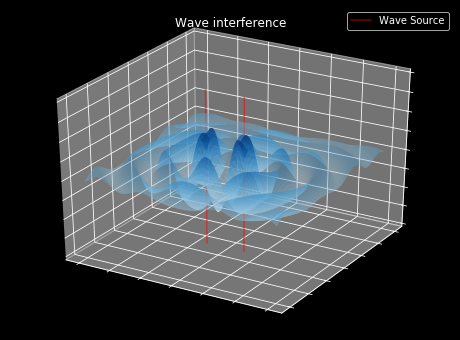

In [123]:
# Create the plot
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

# Plot styling
plt.title("Wave interference")
plt.style.use('dark_background')

# Make the X, Y meshgrid.
xs = np.linspace(-60, 60, 125)
ys = np.linspace(-60, 60, 125)
X, Y = np.meshgrid(xs, ys)

# Set the z axis limits so they aren't recalculated each frame.
ax.set_zlim(-2, 2)

# Draw wave sources as vertical line segments
source1z = np.array([-2, 2])
source1x = np.array([-source1[0], -source1[0]])
source1y = np.array([-source1[1], -source1[1]])
ax.plot3D(source1x, source1y, source1z, 'red', alpha=.5)

source2z = np.array([-2, 2])
source2x = np.array([-source2[0], -source2[0]])
source2y = np.array([-source2[1], -source2[1]])
ax.plot3D(source2x, source2y, source2z, 'red', alpha=.5, label="Wave Source")
ax.legend()

# Remove ticklabels
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_zticklabels([])


# Progressbar for video generation
bar = progressbar.ProgressBar(max_value=Nfrm)

# Begin plotting.
surface = None
Z = generate(X, Y, 0)

def update(idx):
    phi=phis[idx]
    
    global surface
    # If a line collection is already remove it before drawing.
    if surface:
        # ax.collections.remove(wframe)
        ax.collections.remove(surface)

    # Plot the new surface and pause briefly before continuing.
    Z = generate(X, Y, phi * .2)
    surface = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='Blues', alpha=.5, edgecolor='none')
    
    # Rotate graph one unit if we're generating a video
    if nb:
        ax.view_init(azim=(ax.azim + .75))
    
    # Update progressbar
    bar.update(idx)
    
phis = np.linspace(0, 180. / np.pi, Nfrm)
ani = animation.FuncAnimation(fig, update, Nfrm, interval=2000/fps)

In [124]:
# Generate html5 animation video
plt.rcParams['animation.html'] = 'html5'
ani

 99% (479 of 480) |##################### | Elapsed Time: 0:08:36 ETA:   0:00:01

In [116]:
plt.show()